In [2]:
#  Carregar chaves de acesso de arquivo .env
import os
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [3]:

'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ.get("VISION_KEY")
endpoint = os.environ.get("VISION_ENDPOINT")

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [21]:
def read_image_result(image_path, computervision_client):
    # Open the image
    image = open(image_path, "rb")
    read_response = computervision_client.read_in_stream(image, raw=True)

    # Get the operation location (URL with an ID at the end) from the response
    read_operation_location = read_response.headers["Operation-Location"]
    # Grab the ID from the URL
    operation_id = read_operation_location.split("/")[-1]

    # Call the "GET" API and wait for it to retrieve the results 
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    return read_result

def display_image_with_bounding_boxes(image_path, read_results):
    # Open the image
    image = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add bounding boxes to the image
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            bbox = line.bounding_box
            rect = patches.Polygon(
                [[bbox[i], bbox[i + 1]] for i in range(0, len(bbox), 2)],
                linewidth=1, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)
            print(line.text)
    plt.axis('off')  # Hide the axes
    plt.show()
    pass

Northwind Traders
PIGE WINKER
Fresh produce,
IS
friendly service
Open 7 days a week


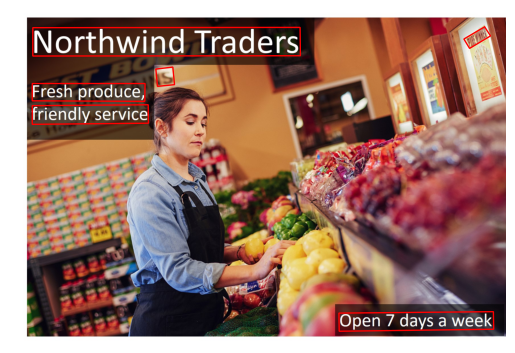

In [22]:
image_path = "images/OCR/advert.jpg"
read_result = read_image_result(image_path, computervision_client)
display_image_with_bounding_boxes(image_path, read_result)

Northwind Traders
123 Main Street
555-123-4567
2/17/2020 13:07
1 Apple
$0.90
1 Orange
$0.80
Sub-Total
$1.70
Tax
$0.17
Total
$1.87


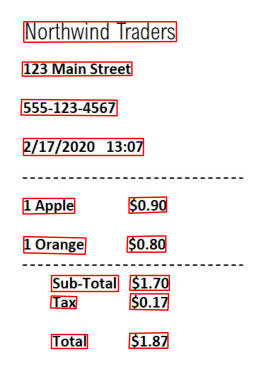

In [23]:
image_path = "images/OCR/receipt.jpg"
read_result = read_image_result(image_path, computervision_client)
display_image_with_bounding_boxes(image_path, read_result)